In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


[*********************100%***********************]  1 of 1 completed
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24728\585208619.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


                 Close
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014


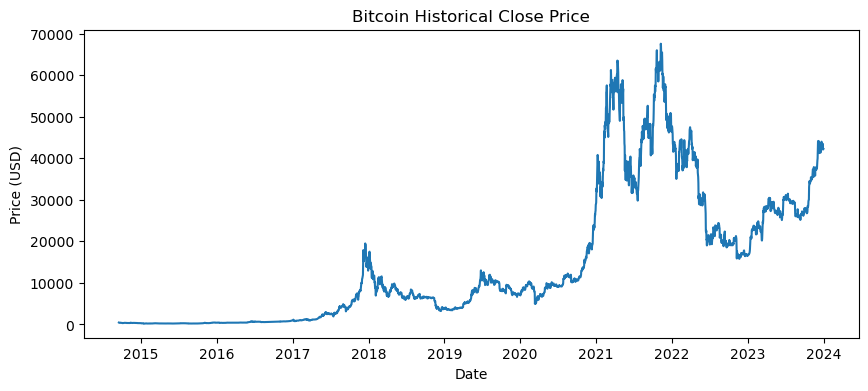

In [2]:
# Define date range and ticker for Bitcoin
start_date = "2014-01-01"
end_date   = "2024-01-01"
ticker = "BTC-USD"  # Yahoo Finance ticker for Bitcoin in USD

data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]  # Focus on closing price
data.dropna(inplace=True)
print(data.head())

# Plot a quick overview of Bitcoin prices
plt.figure(figsize=(10,4))
plt.plot(data.index, data['Close'])
plt.title("Bitcoin Historical Close Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [3]:
# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3333, 60, 1)
y shape: (3333,)


In [4]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [5]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.summary()

history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0108 - val_loss: 0.0010
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0013 - val_loss: 8.0309e-04
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0016 - val_loss: 7.7147e-04
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0016 - val_loss: 6.7265e-04
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0013 - val_loss: 6.3123e-04
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0013 - val_loss: 8.0186e-04
Epoch 9/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0011 - val_loss: 5.0785e-04
Epoch 10/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 9.4186e-04 - val_loss: 5.3045e-04
Epoch 11/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 8.5446e-04 - val_loss: 4.6347e-04
Epoch 12/20
84/84 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

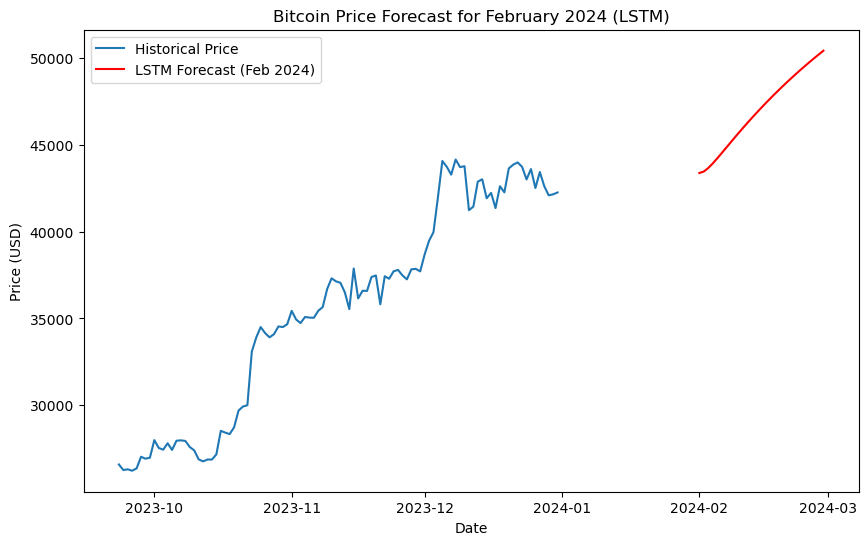

In [6]:
forecast_days = 29

# Get the last sequence from our historical data
last_sequence = scaled_data[-seq_length:]
forecast_input = last_sequence.reshape(1, seq_length, 1)

predictions_scaled = []
for _ in range(forecast_days):
    pred = model_lstm.predict(forecast_input)
    predictions_scaled.append(pred[0, 0])
    new_seq = np.append(forecast_input[0,1:,0], pred[0,0])
    forecast_input = new_seq.reshape(1, seq_length, 1)

# Convert predictions back to original scale
predicted_prices = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1,1))

# Create a DataFrame with forecast dates for February 2024
forecast_dates = pd.date_range(start="2024-02-01", periods=forecast_days)
lstm_forecast_df = pd.DataFrame(data=predicted_prices, index=forecast_dates, columns=["LSTM_Prediction"])

plt.figure(figsize=(10,6))
plt.plot(data.index[-100:], data['Close'].tail(100), label='Historical Price')
plt.plot(lstm_forecast_df.index, lstm_forecast_df["LSTM_Prediction"], label='LSTM Forecast (Feb 2024)', color='red')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Forecast for February 2024 (LSTM)")
plt.legend()
plt.show()


In [11]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline

finbert_model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(finbert_model_name)
model_finbert = TFAutoModelForSequenceClassification.from_pretrained(finbert_model_name)

finbert_pipeline = pipeline("sentiment-analysis", model=model_finbert, tokenizer=tokenizer)

# Example texts representing Bitcoin-related news or social media posts.
texts = [
    "Bitcoin adoption is growing rapidly as institutional investors enter the market.",
    "There are concerns about regulatory crackdowns affecting Bitcoin trading.",
    "Bitcoin's volatility is a cause for caution among many retail investors."
]

sentiments = finbert_pipeline(texts)
for text, sentiment in zip(texts, sentiments):
    print(f"Text: {text}\nSentiment: {sentiment}\n")


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at yiyanghkust/finbert-tone.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
Device set to use 0


Text: Bitcoin adoption is growing rapidly as institutional investors enter the market.
Sentiment: {'label': 'Positive', 'score': 0.9999499320983887}

Text: There are concerns about regulatory crackdowns affecting Bitcoin trading.
Sentiment: {'label': 'Negative', 'score': 0.9999988079071045}

Text: Bitcoin's volatility is a cause for caution among many retail investors.
Sentiment: {'label': 'Negative', 'score': 0.999925971031189}



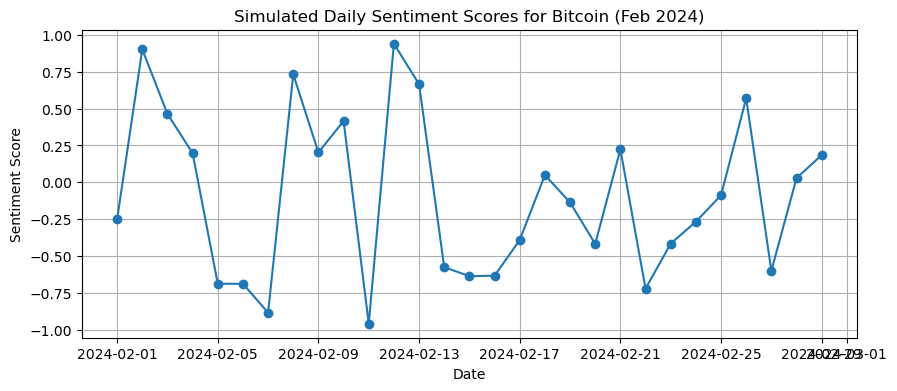

In [12]:
np.random.seed(42)
sentiment_scores = np.random.uniform(low=-1, high=1, size=forecast_days)

sentiment_df = pd.DataFrame(data=sentiment_scores, index=forecast_dates, columns=["Sentiment_Score"])

plt.figure(figsize=(10,4))
plt.plot(sentiment_df.index, sentiment_df["Sentiment_Score"], marker='o', linestyle='-')
plt.title("Simulated Daily Sentiment Scores for Bitcoin (Feb 2024)")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.show()


In [13]:
combined_df = lstm_forecast_df.join(sentiment_df)
combined_df.dropna(inplace=True)
print(combined_df.head())

# Simulate a target: final price is adjusted slightly by the sentiment.
# For example, if sentiment is positive, price might be adjusted upward by 1% of sentiment score.
combined_df['Target'] = combined_df['LSTM_Prediction'] * (1 + 0.01 * combined_df['Sentiment_Score'])
print(combined_df.head())

X_final = combined_df[['LSTM_Prediction', 'Sentiment_Score']].values
y_final = combined_df['Target'].values


            LSTM_Prediction  Sentiment_Score
2024-02-01     43387.605469        -0.250920
2024-02-02     43471.886719         0.901429
2024-02-03     43672.847656         0.463988
2024-02-04     43932.136719         0.197317
2024-02-05     44220.023438        -0.687963
            LSTM_Prediction  Sentiment_Score        Target
2024-02-01     43387.605469        -0.250920  43278.737392
2024-02-02     43471.886719         0.901429  43863.754744
2024-02-03     43672.847656         0.463988  43875.484378
2024-02-04     43932.136719         0.197317  44018.822279
2024-02-05     44220.023438        -0.687963  43915.806162


In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define a simple feed-forward network
input_features = Input(shape=(2,), name="combined_input")
x = Dense(32, activation='relu')(input_features)
x = Dense(16, activation='relu')(x)
final_output = Dense(1, name="final_prediction")(x)

ensemble_model = Model(inputs=input_features, outputs=final_output)
ensemble_model.compile(optimizer='adam', loss='mean_squared_error')
ensemble_model.summary()

# Train the ensemble model (using our simulated target data)
ensemble_model.fit(X_final, y_final, epochs=50, batch_size=4, verbose=1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ combined_input (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_prediction (Dense)        │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1880743808.0000
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1582159360.0000 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1321063296.0000 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1129057792.0000 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 966722496.0000  
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 774374976.0000 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 612738368.0000 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 475928416.0000 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 349214880.0000 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 230334000.0000 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 144608800.0000 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 81494848.0000 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39979252.0000 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


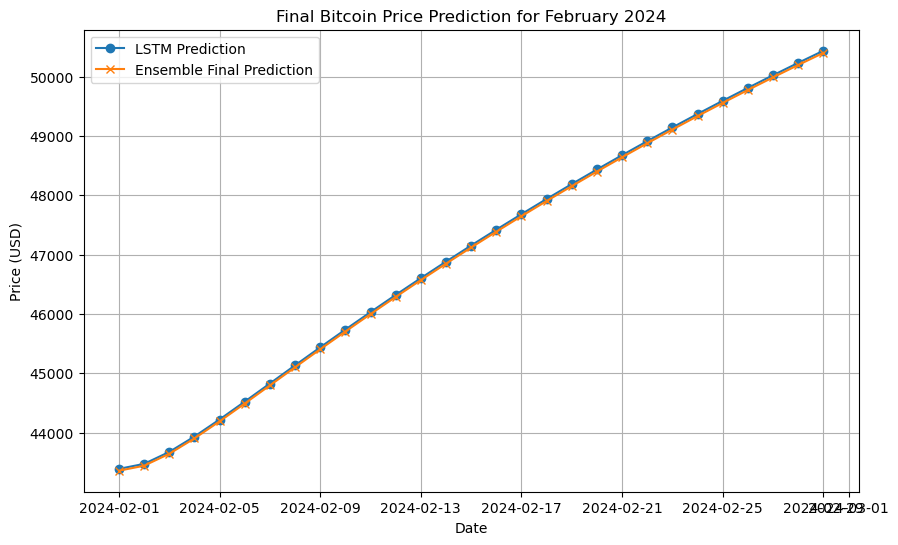

In [17]:
final_predictions = ensemble_model.predict(X_final)
combined_df['Final_Prediction'] = final_predictions

plt.figure(figsize=(10,6))
plt.plot(combined_df.index, combined_df['LSTM_Prediction'], label='LSTM Prediction', marker='o')
plt.plot(combined_df.index, combined_df['Final_Prediction'], label='Ensemble Final Prediction', marker='x')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Final Bitcoin Price Prediction for February 2024")
plt.legend()
plt.grid(True)
plt.show()
